### Settlements mentioned by Caesar in *Commentarii de Bello Gallico*

In [1]:
# Imports relevant libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Imports the a shape file from Natural Earth defining modern nation boundaries.

rome = gpd.read_file('ne_50m_admin_0_countries.shp')

In [3]:
# Returns the contents of the shape file 
print(rome)

          featurecla  scalerank  LABELRANK   SOVEREIGNT SOV_A3  ADM0_DIF  \
0    Admin-0 country          1          3     Zimbabwe    ZWE         0   
1    Admin-0 country          1          3       Zambia    ZMB         0   
2    Admin-0 country          1          3        Yemen    YEM         0   
3    Admin-0 country          3          2      Vietnam    VNM         0   
4    Admin-0 country          5          3    Venezuela    VEN         0   
..               ...        ...        ...          ...    ...       ...   
236  Admin-0 country          1          6      Albania    ALB         0   
237  Admin-0 country          1          3  Afghanistan    AFG         0   
238  Admin-0 country          1          5      Kashmir    KAS         0   
239  Admin-0 country          3          4   Antarctica    ATA         0   
240  Admin-0 country          3          6  Netherlands    NL1         1   

     LEVEL               TYPE            ADMIN ADM0_A3  ...  NAME_KO  \
0        2  Sov

In [4]:
# Returns the Coordinate Reference System assigned to the shape file

print(rome.crs)

epsg:4326


In [43]:
# Loads into a dataframe an XLSX file containing a list of settlements mentioned in Commentarii de Bello Gallico. The commentary by Aulus Hirtius was
# not included in this analysis.

df = pd.read_excel('commentarii.xlsx')
df.head()

,settlement,lat,long,reference,confidence
0,Noreia,47.013808,14.526732,http://www.cambridge.org/us/talbert/talbertdat...,disputed
1,Geneva,46.204400,6.143200,https://latitude.to/map/ch/switzerland/cities/...,high
2,Ocelum,45.116103,7.344923,https://pleiades.stoa.org/places/383720,medium
3,Bibracte,46.920856,4.036056,https://pleiades.stoa.org/places/177473,high
4,Magetobria,47.837500,6.493600,(based on Amage supposedly being the site of M...,medium


In [44]:
# Creates a list comprising latitude-longitude pairs given in the preceding dataframe.
geometry = [Point(xy) for xy in zip(df['long'],df['lat'])]

In [45]:
# Creates a new geodataframe from the preceding dataframe and the 'geometry' list
geodf = gpd.GeoDataFrame(df, geometry = geometry)

In [46]:
# Returns the first five rows of the geodataframe
geodf.head()

,settlement,lat,long,reference,confidence,geometry
0,Noreia,47.013808,14.526732,http://www.cambridge.org/us/talbert/talbertdat...,disputed,POINT (14.52673 47.01381)
1,Geneva,46.204400,6.143200,https://latitude.to/map/ch/switzerland/cities/...,high,POINT (6.14320 46.20440)
2,Ocelum,45.116103,7.344923,https://pleiades.stoa.org/places/383720,medium,POINT (7.34492 45.11610)
3,Bibracte,46.920856,4.036056,https://pleiades.stoa.org/places/177473,high,POINT (4.03606 46.92086)
4,Magetobria,47.837500,6.493600,(based on Amage supposedly being the site of M...,medium,POINT (6.49360 47.83750)


In [47]:
# Sets the Coordinate Reference System for the geodataframe to EPSG:4326, so that the shape file and geodataframe are assigned an identical CRS.
geodf = geodf.set_crs('EPSG:4326')

<ipython-input-56-6f954b53eb19>:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  geodf.apply(lambda x: ax.annotate(s=x.settlement, xy=x.geometry.centroid.coords[0], ha = 'center', va = 'bottom', fontsize=8, color = 'black'),axis=1)


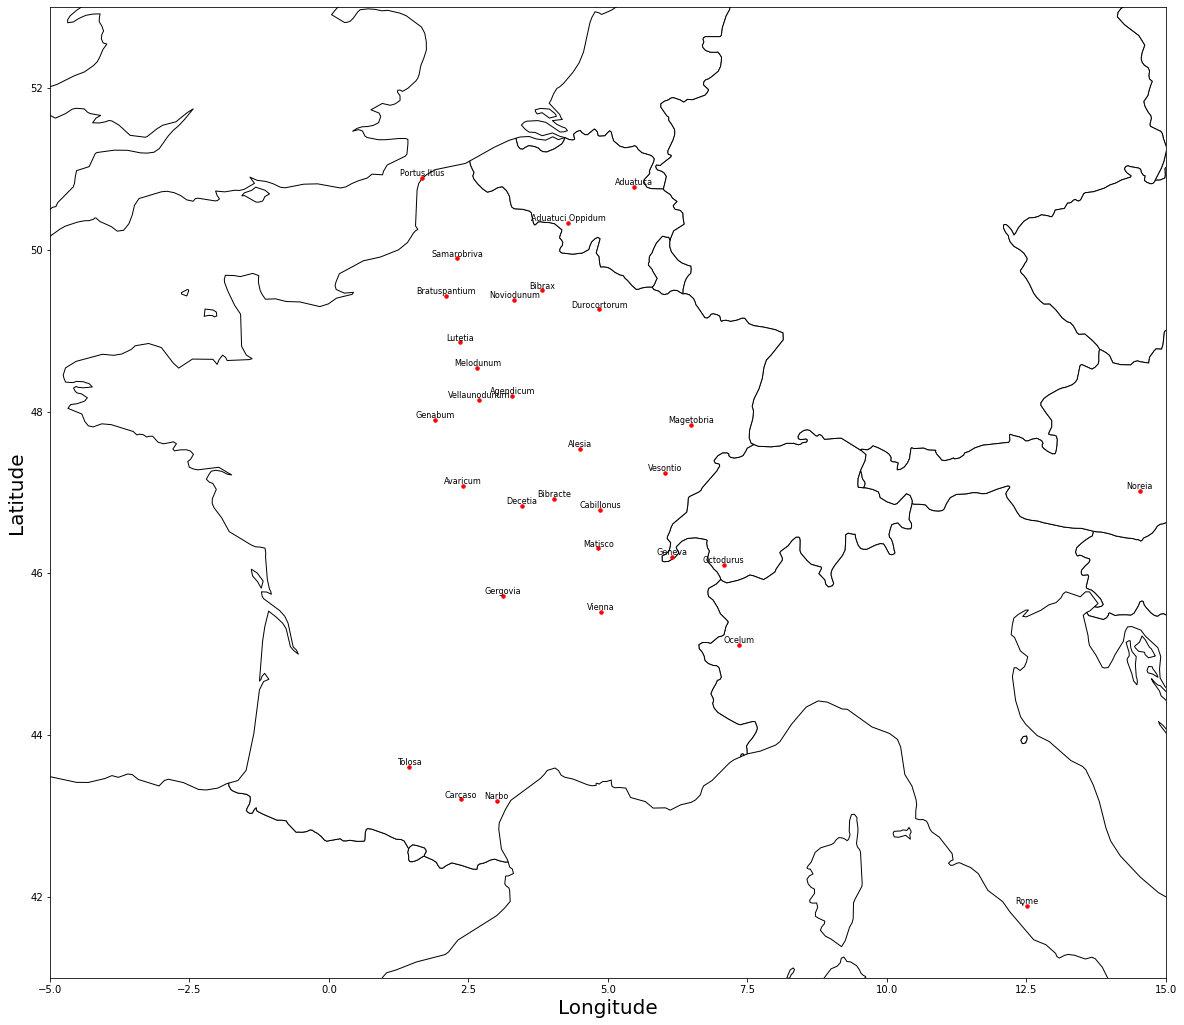

In [56]:
# Plots a map displaying Gaul and surrounding territories, with the approximate locations of settlements mentioned by Caesar overlaid as points.

fig, ax = plt.subplots()
ax.set_aspect('equal')
rome.plot(ax=ax, edgecolor ='black', color = 'white')
geodf.apply(lambda x: ax.annotate(s=x.settlement, xy=x.geometry.centroid.coords[0], ha = 'center', va = 'bottom', fontsize=8, color = 'black'),axis=1)
geodf.plot(ax=ax, marker='o', color ='red', markersize = 12)
ax.set_xlabel('Longitude', fontsize = 20)
ax.set_ylabel('Latitude', fontsize = 20)
ax.set_ylim(41,53)
ax.set_xlim(-5,15)
fig.set_size_inches(20,20)

# Saves a PNG of the map

fig.savefig('caesarsettlements.png', dpi = 600)
